### Goal

In this chapter

We will see how to match features in one image with others.
We will use the Brute-Force matcher in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
original_image = cv2.imread('../images/berlin.jpg')
#lets crop the original_image
#Finding size of the image
height, width = original_image.shape[:2]
#Top  left of cropped rectangle
start_height, start_width = 0,0
#Bottom right of cropeed rectangle
end_height, end_width = int(height * .75), int(width * .65)

#Simply use indexing to crop out the rectangle we desire
cropped = original_image[start_height:end_height , start_width:end_width]
#rotated_image
rotated_image = cv2.rotate(cropped, cv2.ROTATE_90_CLOCKWISE)

### Brute-Force Matching with ORB Descriptors

Here, we will see a simple example on how to match features between two images. 

We are using ORB descriptors to match features. So let's start with finding descriptors.

In [3]:
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(original_image,None)
kp2, des2 = orb.detectAndCompute(rotated_image,None)

Next we create a BFMatcher object with distance measurement cv.NORM_HAMMING (since we are using ORB) and crossCheck is switched on for better results. Then we use Matcher.match() method to get the best matches in two images. We sort them in ascending order of their distances so that best matches (with low distance) come to front. Then we draw only first 50 matches (Just for sake of visibility. You can increase it as you like)

In [4]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [5]:
# Match descriptors.
matches = bf.match(des1,des2)

In [6]:
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv2.drawMatches(original_image,kp1,rotated_image,kp2,matches[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)



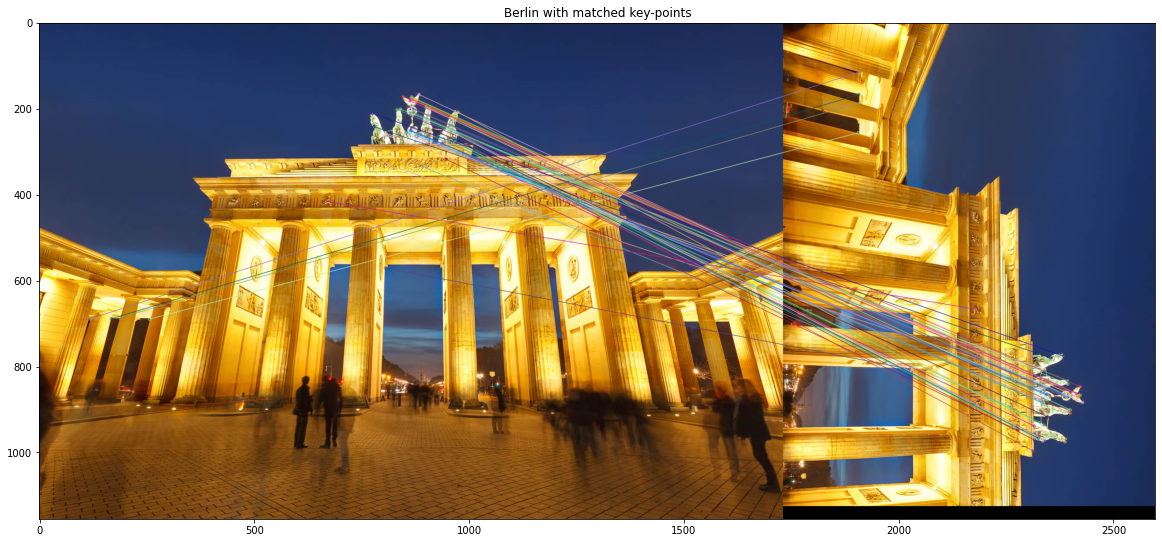

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Berlin with matched key-points')
plt.show()